<a href="https://colab.research.google.com/github/RandDahmash/Mining-project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Load the Dataset
df = pd.read_csv("Cleaned_dataset.csv")
df.head()



,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,0.6,2,1,0,1,1,0,1,2,1,0,2,2
1,1,0.6,2,1,0,1,0,0,0,2,0,1,1,2
2,1,0.4,0,0,0,1,1,0,1,2,0,0,1,2
3,1,0.2,1,1,0,1,1,0,0,2,0,0,1,2
4,1,0.4,1,1,0,1,1,1,0,1,0,0,1,1


In [10]:
#Number of rows and columns is the preprossed dataset
df.shape

(256, 14)

In [11]:
#Split dataset in features and target variable
fn=df.keys().tolist()[:-1]
X = df[fn]#Features names
y = df["Adaptivity Level"]#target variable

#Clustring





# **1**-Splitting dataset into 70% Training and 30% Testing

In [16]:

# Split dataset into 70% Training and 30% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (179, 13)
Testing set size: (77, 13)


## Gini index

In [27]:
#Build Decision Tree Model (Gini Index)

# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)


Accuracy: 0.42857142857142855
Confusion Matrix:
[[ 1  0  2]
 [ 4 17 13]
 [ 9 16 15]]


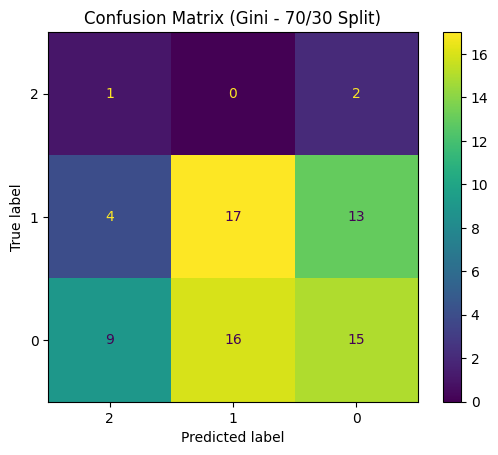

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 70/30 Split)")
plt.show()

The diagonal elements (1, 17, 15) show correctly classified samples for each class (low, moderate, high).

The model performs best for the middle class (label = 1) with 17 correct predictions.

there is significant confusion between class 0 and class 2, where several “Low” adaptivity students are predicted as “High” (9 misclassified)






[Text(0.6914981617647059, 0.96875, 'Financial Condition <= 1.5\ngini = 0.597\nsamples = 179\nvalue = [21, 80, 78]\nclass = 1'),
 Text(0.45358455882352944, 0.90625, 'Institution Type <= 0.5\ngini = 0.555\nsamples = 164\nvalue = [10, 79, 75]\nclass = 1'),
 Text(0.5725413602941176, 0.9375, 'True  '),
 Text(0.23823529411764705, 0.84375, 'Gender <= 0.5\ngini = 0.462\nsamples = 69\nvalue = [2, 46, 21]\nclass = 1'),
 Text(0.13529411764705881, 0.78125, 'Age <= 0.1\ngini = 0.517\nsamples = 46\nvalue = [2.0, 27.0, 17.0]\nclass = 1'),
 Text(0.12352941176470589, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.14705882352941177, 0.71875, 'Age <= 0.5\ngini = 0.526\nsamples = 44\nvalue = [2.0, 25.0, 17.0]\nclass = 1'),
 Text(0.07647058823529412, 0.65625, 'Location <= 0.5\ngini = 0.545\nsamples = 20\nvalue = [1, 9, 10]\nclass = 0'),
 Text(0.03529411764705882, 0.59375, 'Education Level <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]\nclass = 1'),
 Text(0.0235294117647058

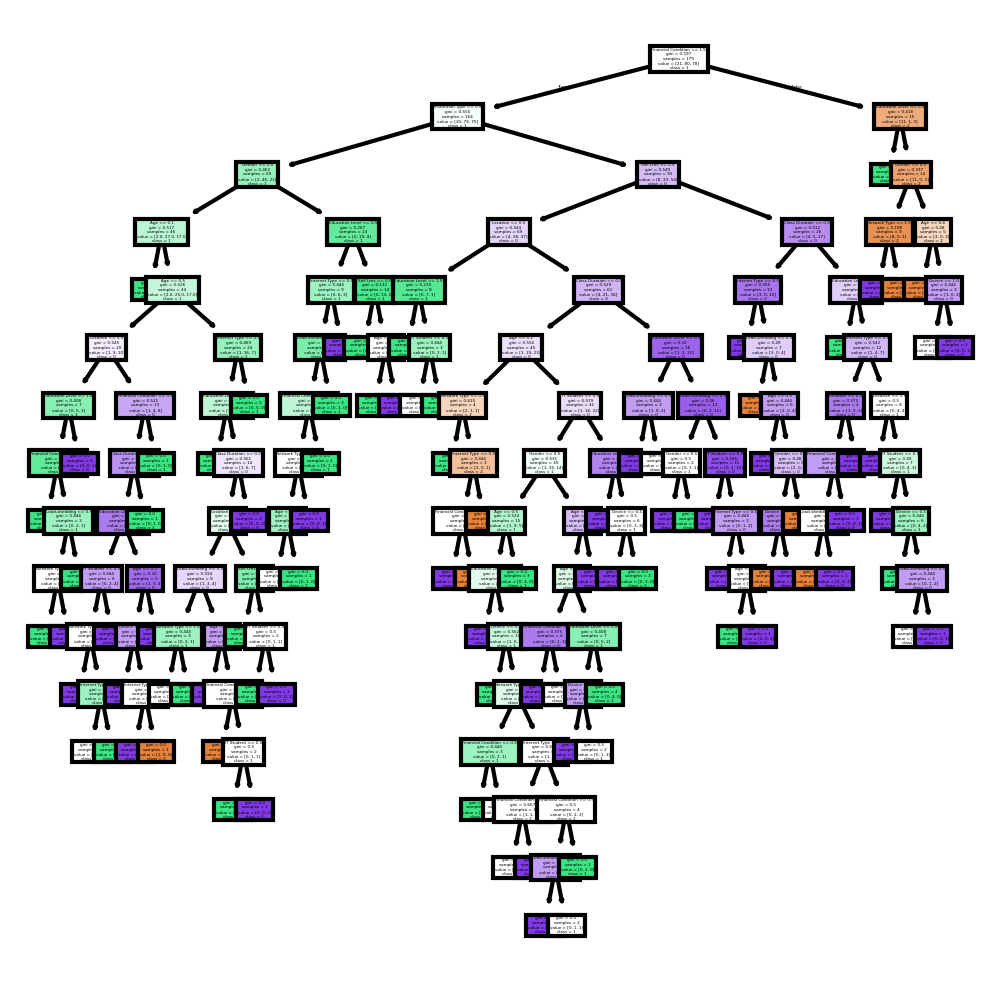

In [36]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=300 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Entropy


In [21]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

Accuracy: 0.44155844155844154
Confusion Matrix:
[[ 0  1  2]
 [ 4 18 12]
 [ 9 15 16]]


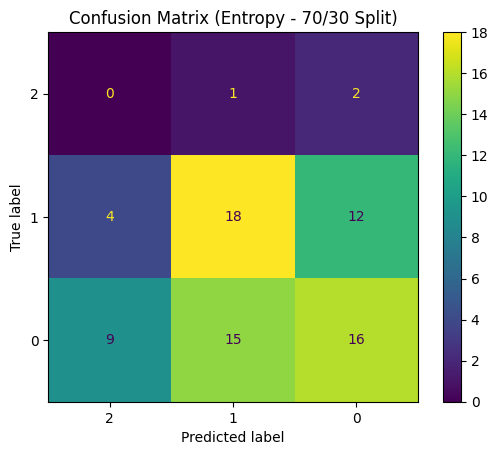

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 70/30 Split)")
plt.show()

Entropy correctly classifies 18 samples from class 1 (Moderate), slightly better than Gini.

The number of correct “High” predictions (16) is also similar.

Like Gini, it struggles to identify “Low” adaptivity students (0 correct, 3 misclassified).

[Text(0.6585776179941003, 0.9666666666666667, 'Financial Condition <= 1.5\nentropy = 1.404\nsamples = 179\nvalue = [21, 80, 78]\nclass = 1'),
 Text(0.41745022123893805, 0.9, 'Institution Type <= 0.5\nentropy = 1.27\nsamples = 164\nvalue = [10, 79, 75]\nclass = 1'),
 Text(0.5380139196165192, 0.9333333333333333, 'True  '),
 Text(0.2640117994100295, 0.8333333333333334, 'Gender <= 0.5\nentropy = 1.06\nsamples = 69\nvalue = [2, 46, 21]\nclass = 1'),
 Text(0.17404129793510326, 0.7666666666666667, 'Age <= 0.7\nentropy = 1.179\nsamples = 46\nvalue = [2.0, 27.0, 17.0]\nclass = 1'),
 Text(0.10029498525073746, 0.7, 'Age <= 0.3\nentropy = 1.113\nsamples = 41\nvalue = [1, 24, 16]\nclass = 1'),
 Text(0.0471976401179941, 0.6333333333333333, 'Internet Type <= 0.5\nentropy = 1.459\nsamples = 6\nvalue = [1, 3, 2]\nclass = 1'),
 Text(0.02359882005899705, 0.5666666666666667, 'Age <= 0.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]\nclass = 1'),
 Text(0.011799410029498525, 0.5, 'entropy = 0.0\nsamples 

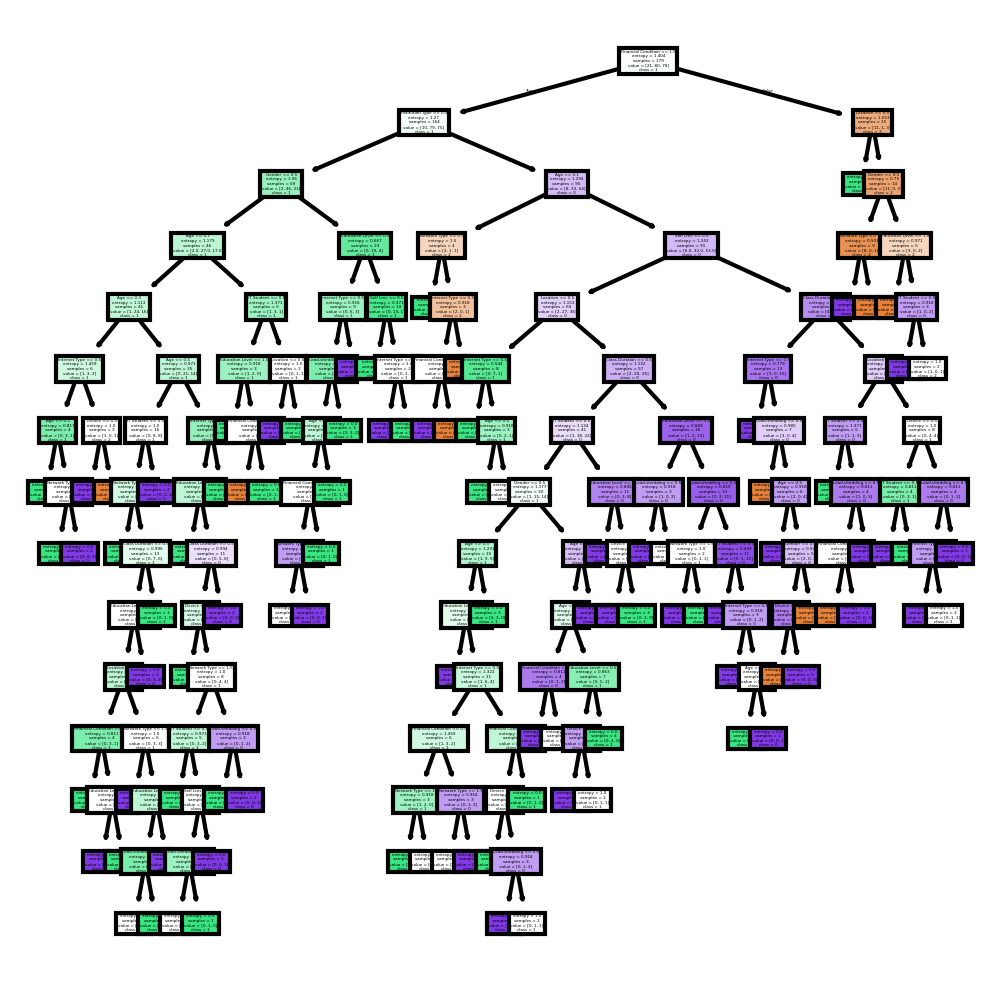

In [38]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=300 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

# Comparsion :
Gini Index accuracy=	0.429 (42.86%)	 lower accuracy

Information Gain (Entropy) accuracy=	0.442 (44.16%)	higher accuracy

based on the accuracy , using Entropy is better when splitting using 70/30 size